# Project Name:: Optimization of Bus Ticketing Demand and Forecasting

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statistics

In [126]:
data=pd.read_csv(r"B:\Project\ML_ForeCasting_AISPRAY\Data Set\Operational_Bus_data - Operational_Bus_data.csv")
data

Date Bus Route No.                         From  \
0      01-01-2022          156S             Nagole Ring Road   
1      01-01-2022          45HK                HCU Bus Depot   
2      02-01-2022          201M  High Court Colony Deer Park   
3      02-01-2022         127VB        Rythu Bazar Erragadda   
4      03-01-2022          201M  High Court Colony Deer Park   
...           ...           ...                          ...   
14273  13-01-2025          225S                 Chengicherla   
14274  14-01-2025       9K/283K          Central Bus Station   
14275  14-01-2025      10H/250C      Chandrayan Gutta X Road   
14276  14-01-2025          230X                    Charminar   
14277  14-01-2025          223R                         KPHB   

                      To  Trips per Day         Way  Bus Stops Covered  \
0                Anajpur              8  Round Trip                 34   
1      Bachupally X Road              8     One-way                 11   
2           Kavadi Pally             10     One Way                  7   
3                   koti              2     One-way                  7   
4              Majeedpur             10  Round Trip                 34   
...                  ...            ...         ...                ...   
14273        Lingampally             19     One Way                 22   
14274     Gajula Ramaram             19  Round Trip                 23   
14275           Ameerpet             14  Round Trip                 22   
14276         Bachupally             13  Round Trip                  5   
14277           Ameerpet             12  Round Trip                 16   

       Frequency (mins)  Distance Travelled (km)  Time (mins) Main Station  \
0                  60.0                    59.68         47.0         Koti   
1                  27.0                    28.72         61.0  Hitech City   
2                  10.0                    20.12         58.0         Koti   
3                  46.0                    27.37         64.0  Hitech City   
4                  48.0                    85.46         28.0         Koti   
...                 ...                      ...          ...          ...   
14273               5.0                    11.62         61.0     Ameerpet   
14274               5.0                    45.00         21.0     Ameerpet   
14275               5.0                    34.52        102.0     Ameerpet   
14276               5.0                    43.74         99.0     Ameerpet   
14277              20.0                    45.63         66.0     Ameerpet   

       Tickets Sold  Revenue Generated (INR)  
0               369              1475.350000  
1               359              4144.820000  
2               261              2785.520000  
3               196              3355.805813  
4               428              2216.250000  
...             ...                      ...  
14273           386              8863.360000  
14274           269              9115.820000  
14275           205              6165.130000  
14276           218             14895.010000  
14277           214              6364.710000  

[14278 rows x 13 columns]

In [68]:
data.head()

Date Bus Route No.                         From                 To  \
0  01-01-2022          156S             Nagole Ring Road            Anajpur   
1  01-01-2022          45HK                HCU Bus Depot  Bachupally X Road   
2  02-01-2022          201M  High Court Colony Deer Park       Kavadi Pally   
3  02-01-2022         127VB        Rythu Bazar Erragadda               koti   
4  03-01-2022          201M  High Court Colony Deer Park          Majeedpur   

   Trips per Day         Way  Bus Stops Covered  Frequency (mins)  \
0              8  Round Trip                 34              60.0   
1              8     One-way                 11              27.0   
2             10     One Way                  7              10.0   
3              2     One-way                  7              46.0   
4             10  Round Trip                 34              48.0   

   Distance Travelled (km)  Time (mins) Main Station  Tickets Sold  \
0                    59.68         47.0         Koti           369   
1                    28.72         61.0  Hitech City           359   
2                    20.12         58.0         Koti           261   
3                    27.37         64.0  Hitech City           196   
4                    85.46         28.0         Koti           428   

   Revenue Generated (INR)  
0              1475.350000  
1              4144.820000  
2              2785.520000  
3              3355.805813  
4              2216.250000

In [69]:
data.tail()

Date Bus Route No.                     From              To  \
14273  13-01-2025          225S             Chengicherla     Lingampally   
14274  14-01-2025       9K/283K      Central Bus Station  Gajula Ramaram   
14275  14-01-2025      10H/250C  Chandrayan Gutta X Road        Ameerpet   
14276  14-01-2025          230X                Charminar      Bachupally   
14277  14-01-2025          223R                     KPHB        Ameerpet   

       Trips per Day         Way  Bus Stops Covered  Frequency (mins)  \
14273             19     One Way                 22               5.0   
14274             19  Round Trip                 23               5.0   
14275             14  Round Trip                 22               5.0   
14276             13  Round Trip                  5               5.0   
14277             12  Round Trip                 16              20.0   

       Distance Travelled (km)  Time (mins) Main Station  Tickets Sold  \
14273                    11.62         61.0     Ameerpet           386   
14274                    45.00         21.0     Ameerpet           269   
14275                    34.52        102.0     Ameerpet           205   
14276                    43.74         99.0     Ameerpet           218   
14277                    45.63         66.0     Ameerpet           214   

       Revenue Generated (INR)  
14273                  8863.36  
14274                  9115.82  
14275                  6165.13  
14276                 14895.01  
14277                  6364.71

In [70]:
data.describe()

Trips per Day  Bus Stops Covered  Frequency (mins)  \
count   14278.000000       14278.000000      14262.000000   
mean       12.343676          17.966732         18.147665   
std         5.718016           8.409151         11.207445   
min         1.000000           3.000000          5.000000   
25%         8.000000          11.000000         10.000000   
50%        12.000000          18.000000         15.000000   
75%        16.000000          24.000000         29.000000   
max       190.000000          50.000000         60.000000   

       Distance Travelled (km)   Time (mins)  Tickets Sold  \
count             14259.000000  14248.000000  14278.000000   
mean                 29.276346     65.549832    298.063244   
std                  15.721085     32.032864    138.656267   
min                   5.000000     10.000000     50.000000   
25%                  16.845000     38.000000    195.000000   
50%                  28.400000     66.000000    297.000000   
75%                  40.150000     93.000000    398.000000   
max                  99.820000    120.000000   4560.000000   

       Revenue Generated (INR)  
count             14278.000000  
mean               9125.130470  
std               11586.443384  
min                 503.040000  
25%                4326.942500  
50%                7710.900916  
75%               11428.755000  
max              149746.400000

In [71]:
data.shape

(14278, 13)

In [72]:
data.shape[0]

14278

In [73]:
data.shape[1]

13

In [74]:
data.info

<bound method DataFrame.info of              Date Bus Route No.                         From  \
0      01-01-2022          156S             Nagole Ring Road   
1      01-01-2022          45HK                HCU Bus Depot   
2      02-01-2022          201M  High Court Colony Deer Park   
3      02-01-2022         127VB        Rythu Bazar Erragadda   
4      03-01-2022          201M  High Court Colony Deer Park   
...           ...           ...                          ...   
14273  13-01-2025          225S                 Chengicherla   
14274  14-01-2025       9K/283K          Central Bus Station   
14275  14-01-2025      10H/250C      Chandrayan Gutta X Road   
14276  14-01-2025          230X                    Charminar   
14277  14-01-2025          223R                         KPHB   

                      To  Trips per Day         Way  Bus Stops Covered  \
0                Anajpur              8  Round Trip                 34   
1      Bachupally X Road              8     One-way

In [75]:
data.dtypes

Date                        object
Bus Route No.               object
From                        object
To                          object
Trips per Day                int64
Way                         object
Bus Stops Covered            int64
Frequency (mins)           float64
Distance Travelled (km)    float64
Time (mins)                float64
Main Station                object
Tickets Sold                 int64
Revenue Generated (INR)    float64
dtype: object

In [76]:
data.isna().sum()

Date                        0
Bus Route No.              17
From                        0
To                          0
Trips per Day               0
Way                         0
Bus Stops Covered           0
Frequency (mins)           16
Distance Travelled (km)    19
Time (mins)                30
Main Station                0
Tickets Sold                0
Revenue Generated (INR)     0
dtype: int64

In [77]:
data.columns

Index(['Date', 'Bus Route No.', 'From', 'To', 'Trips per Day', 'Way',
       'Bus Stops Covered', 'Frequency (mins)', 'Distance Travelled (km)',
       'Time (mins)', 'Main Station', 'Tickets Sold',
       'Revenue Generated (INR)'],
      dtype='object')

### 1. First Moment Business Decision / Measures of Central Tendency

In [78]:
Mean= data[['Trips per Day','Bus Stops Covered','Frequency (mins)','Distance Travelled (km)',
            'Time (mins)','Tickets Sold','Revenue Generated (INR)']].mean()
Mean

Trips per Day                12.343676
Bus Stops Covered            17.966732
Frequency (mins)             18.147665
Distance Travelled (km)      29.276346
Time (mins)                  65.549832
Tickets Sold                298.063244
Revenue Generated (INR)    9125.130470
dtype: float64

In [79]:
Median= data[['Trips per Day','Bus Stops Covered','Frequency (mins)','Distance Travelled (km)',
            'Time (mins)','Tickets Sold','Revenue Generated (INR)']].median()
Median

Trips per Day                12.000000
Bus Stops Covered            18.000000
Frequency (mins)             15.000000
Distance Travelled (km)      28.400000
Time (mins)                  66.000000
Tickets Sold                297.000000
Revenue Generated (INR)    7710.900916
dtype: float64

In [80]:
mode=data[['Trips per Day','Bus Stops Covered','Frequency (mins)','Distance Travelled (km)',
            'Time (mins)','Tickets Sold','Revenue Generated (INR)']].mode()
print(mode)

    Trips per Day  Bus Stops Covered  Frequency (mins)  \
0            12.0               21.0              20.0   
1             NaN                NaN               NaN   
2             NaN                NaN               NaN   
3             NaN                NaN               NaN   
4             NaN                NaN               NaN   
5             NaN                NaN               NaN   
6             NaN                NaN               NaN   
7             NaN                NaN               NaN   
8             NaN                NaN               NaN   
9             NaN                NaN               NaN   
10            NaN                NaN               NaN   
11            NaN                NaN               NaN   
12            NaN                NaN               NaN   
13            NaN                NaN               NaN   
14            NaN                NaN               NaN   
15            NaN                NaN               NaN   
16            

In [82]:
categorical_columns_mode= data[['Bus Route No.','From','To','Way','Main Station']].mode()
print(categorical_columns_mode)

  Bus Route No.         From        To         Way Main Station
0        19/224  Mehdipatnam  Ameerpet  Round Trip     Ameerpet


### 2. Second Moment Business Decision / Measures of Dispersion

In [83]:
Standard_Deviation=data[['Trips per Day','Bus Stops Covered','Frequency (mins)','Distance Travelled (km)',
            'Time (mins)','Tickets Sold','Revenue Generated (INR)']].std()
print(Standard_Deviation)

Trips per Day                  5.718016
Bus Stops Covered              8.409151
Frequency (mins)              11.207445
Distance Travelled (km)       15.721085
Time (mins)                   32.032864
Tickets Sold                 138.656267
Revenue Generated (INR)    11586.443384
dtype: float64


In [84]:
Min =data[['Trips per Day','Bus Stops Covered','Frequency (mins)','Distance Travelled (km)',
            'Time (mins)','Tickets Sold','Revenue Generated (INR)']].min()
Min

Trips per Day                1.00
Bus Stops Covered            3.00
Frequency (mins)             5.00
Distance Travelled (km)      5.00
Time (mins)                 10.00
Tickets Sold                50.00
Revenue Generated (INR)    503.04
dtype: float64

In [85]:
Max =data[['Trips per Day','Bus Stops Covered','Frequency (mins)','Distance Travelled (km)',
            'Time (mins)','Tickets Sold','Revenue Generated (INR)']].max()
Max

Trips per Day                 190.00
Bus Stops Covered              50.00
Frequency (mins)               60.00
Distance Travelled (km)        99.82
Time (mins)                   120.00
Tickets Sold                 4560.00
Revenue Generated (INR)    149746.40
dtype: float64

In [86]:
Range = Max-Min
print(Range)

Trips per Day                 189.00
Bus Stops Covered              47.00
Frequency (mins)               55.00
Distance Travelled (km)        94.82
Time (mins)                   110.00
Tickets Sold                 4510.00
Revenue Generated (INR)    149243.36
dtype: float64


In [87]:
data.describe()

Trips per Day  Bus Stops Covered  Frequency (mins)  \
count   14278.000000       14278.000000      14262.000000   
mean       12.343676          17.966732         18.147665   
std         5.718016           8.409151         11.207445   
min         1.000000           3.000000          5.000000   
25%         8.000000          11.000000         10.000000   
50%        12.000000          18.000000         15.000000   
75%        16.000000          24.000000         29.000000   
max       190.000000          50.000000         60.000000   

       Distance Travelled (km)   Time (mins)  Tickets Sold  \
count             14259.000000  14248.000000  14278.000000   
mean                 29.276346     65.549832    298.063244   
std                  15.721085     32.032864    138.656267   
min                   5.000000     10.000000     50.000000   
25%                  16.845000     38.000000    195.000000   
50%                  28.400000     66.000000    297.000000   
75%                  40.150000     93.000000    398.000000   
max                  99.820000    120.000000   4560.000000   

       Revenue Generated (INR)  
count             14278.000000  
mean               9125.130470  
std               11586.443384  
min                 503.040000  
25%                4326.942500  
50%                7710.900916  
75%               11428.755000  
max              149746.400000

In [88]:
performance_Variance=data[['Trips per Day','Bus Stops Covered','Frequency (mins)','Distance Travelled (km)',
            'Time (mins)','Tickets Sold','Revenue Generated (INR)']].var()
print(performance_Variance)

Trips per Day              3.269571e+01
Bus Stops Covered          7.071382e+01
Frequency (mins)           1.256068e+02
Distance Travelled (km)    2.471525e+02
Time (mins)                1.026104e+03
Tickets Sold               1.922556e+04
Revenue Generated (INR)    1.342457e+08
dtype: float64


### 3.Third Moment Business Decision / Skewness

In [89]:
Skewness=data[['Trips per Day','Bus Stops Covered','Frequency (mins)','Distance Travelled (km)',
            'Time (mins)','Tickets Sold','Revenue Generated (INR)']].skew()
print(Skewness)

Trips per Day              7.701129
Bus Stops Covered          0.492591
Frequency (mins)           1.062833
Distance Travelled (km)    0.897488
Time (mins)               -0.021593
Tickets Sold               6.753050
Revenue Generated (INR)    7.793012
dtype: float64


### 4.Fourth Moment Business Decision / Kurtosis

In [90]:
Kurtosis=data[['Trips per Day','Bus Stops Covered','Frequency (mins)','Distance Travelled (km)',
            'Time (mins)','Tickets Sold','Revenue Generated (INR)']].kurtosis()
print(Kurtosis)

Trips per Day              216.079041
Bus Stops Covered            0.230154
Frequency (mins)             1.239367
Distance Travelled (km)      1.873777
Time (mins)                 -1.200603
Tickets Sold               172.713734
Revenue Generated (INR)     72.876032
dtype: float64


### 5.Graphical Representation

In [91]:
data.columns

Index(['Date', 'Bus Route No.', 'From', 'To', 'Trips per Day', 'Way',
       'Bus Stops Covered', 'Frequency (mins)', 'Distance Travelled (km)',
       'Time (mins)', 'Main Station', 'Tickets Sold',
       'Revenue Generated (INR)'],
      dtype='object')

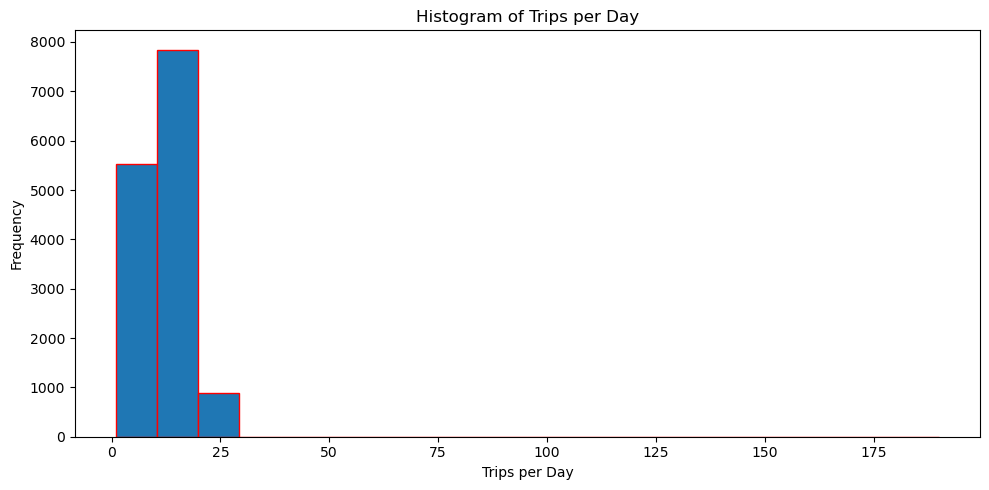

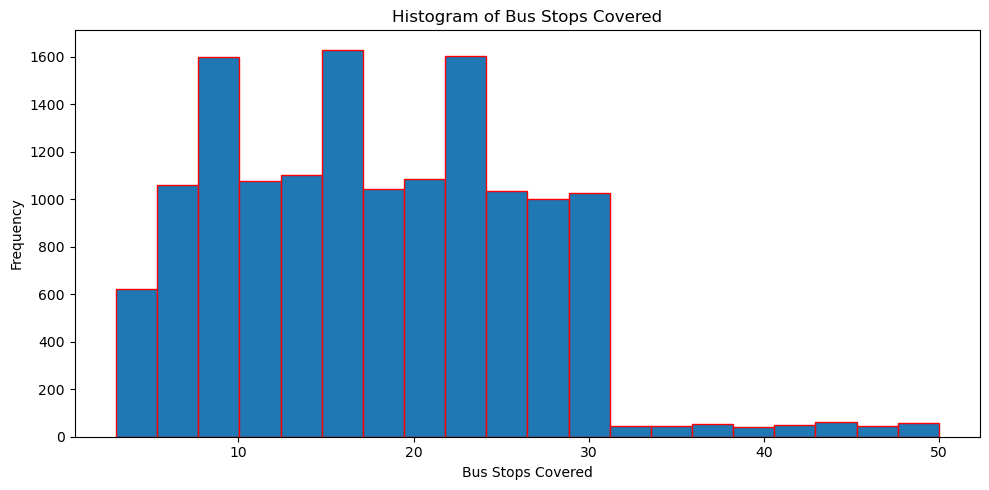

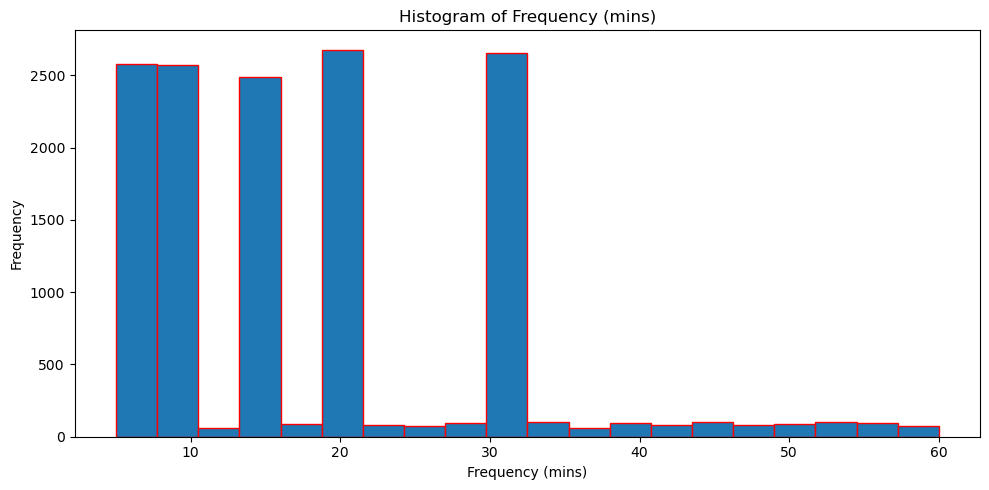

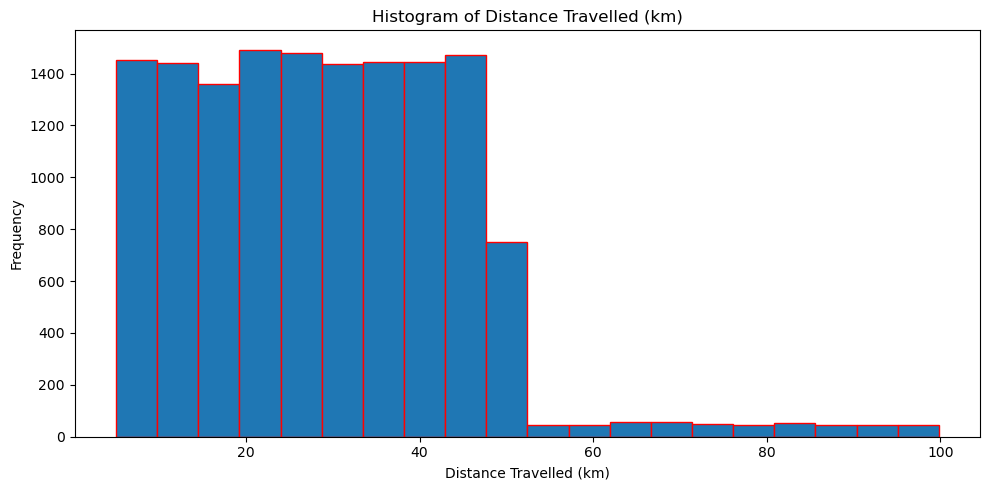

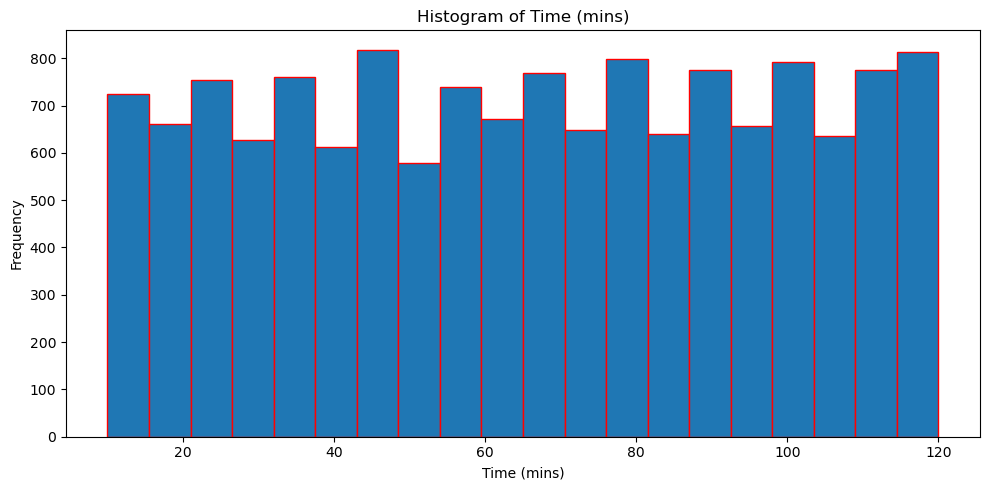

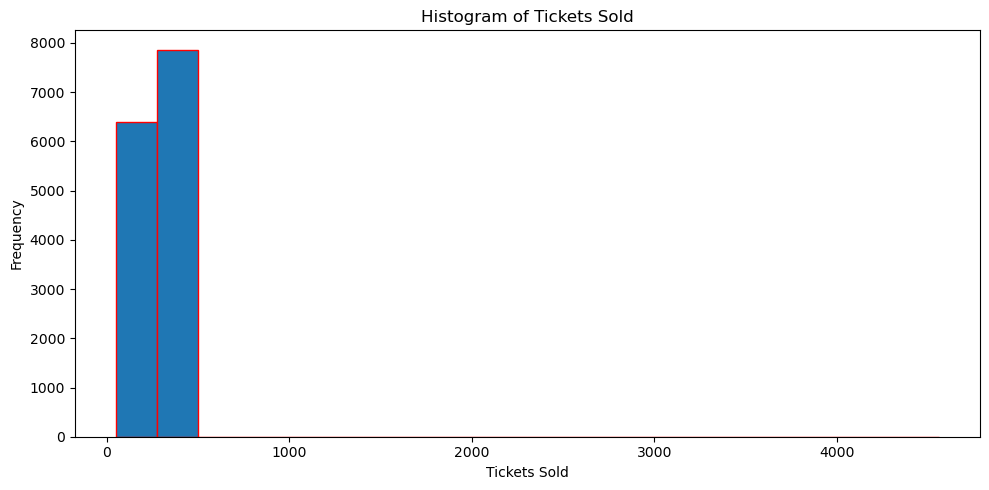

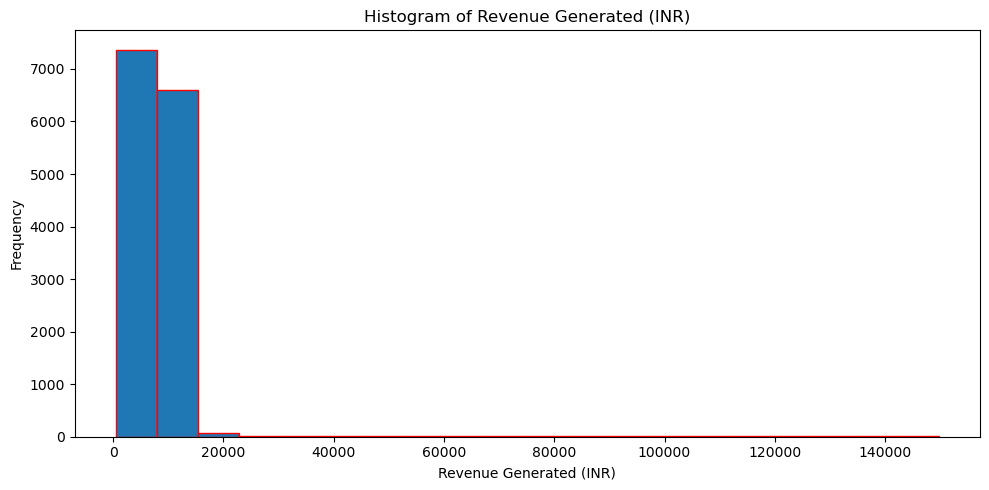

In [92]:
Numerical_columns = ['Trips per Day', 'Bus Stops Covered', 'Frequency (mins)', 'Distance Travelled (km)', 
                   'Time (mins)', 'Tickets Sold', 'Revenue Generated (INR)']

for i in Numerical_columns:
    plt.figure(figsize=(10, 5))
    plt.hist(data[i].dropna(), bins=20, edgecolor='red')  # Drop NA values before plotting
    plt.title(f'Histogram of {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.tight_layout()

In [93]:
data.dtypes

Date                        object
Bus Route No.               object
From                        object
To                          object
Trips per Day                int64
Way                         object
Bus Stops Covered            int64
Frequency (mins)           float64
Distance Travelled (km)    float64
Time (mins)                float64
Main Station                object
Tickets Sold                 int64
Revenue Generated (INR)    float64
dtype: object

##### Univariate

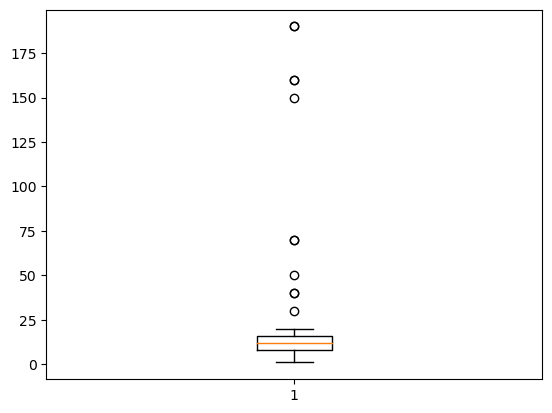

In [94]:

Univariate=plt.boxplot(data['Trips per Day'])

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Main Station', ylabel='count'>

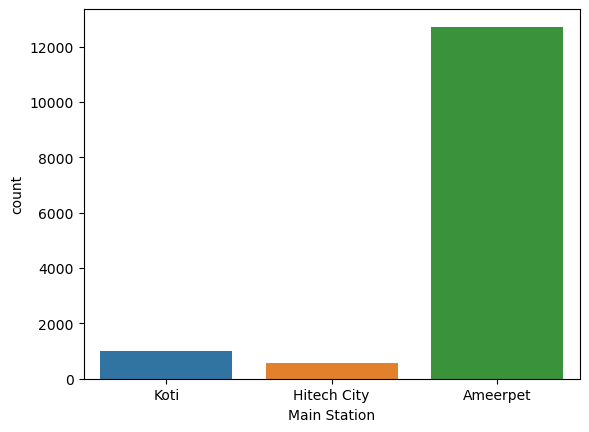

In [25]:
sns.countplot(data['Main Station'])

<AxesSubplot:ylabel='Main Station'>

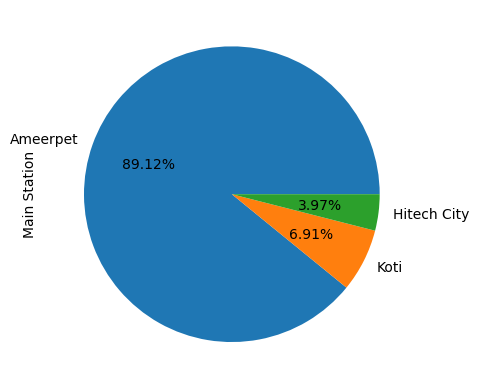

In [35]:
data['Main Station'].value_counts()

In [ ]:
data['Main Station'].value_counts().plot(kind="pie",autopct='%1.2f%%')

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Tickets Sold', ylabel='Density'>

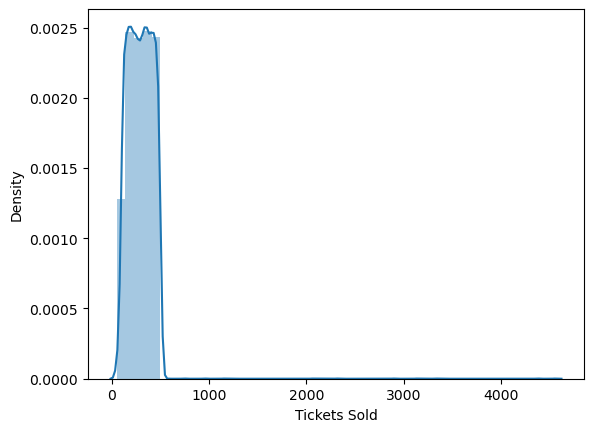

In [37]:
sns.distplot(data['Tickets Sold'])

(array([1.3373e+04, 8.9500e+02, 3.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([  1. ,  19.9,  38.8,  57.7,  76.6,  95.5, 114.4, 133.3, 152.2,
        171.1, 190. ]),
 <BarContainer object of 10 artists>)

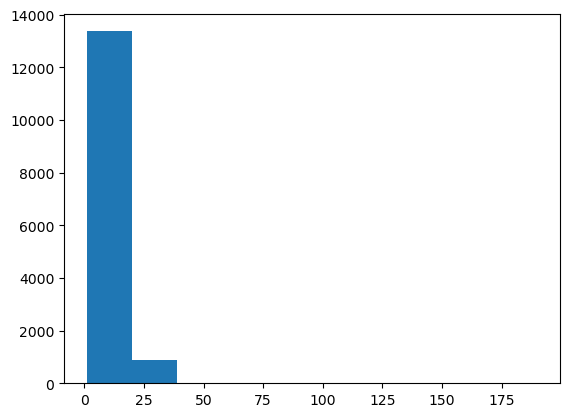

In [38]:
plt.hist(data['Trips per Day'])

#### Bivariate

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Main Station', ylabel='Trips per Day'>

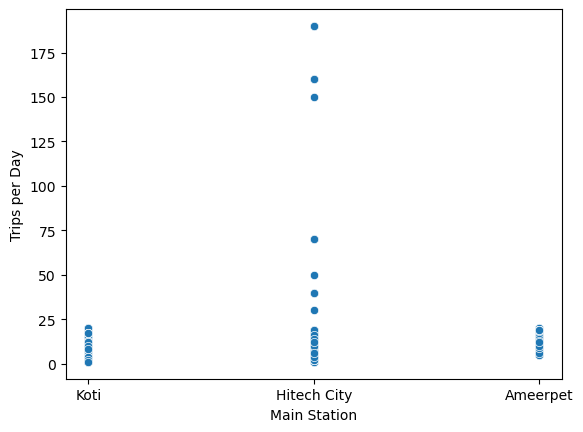

In [42]:
sns.scatterplot(data['Main Station'], data['Trips per Day'])

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Distance Travelled (km)', ylabel='Tickets Sold'>

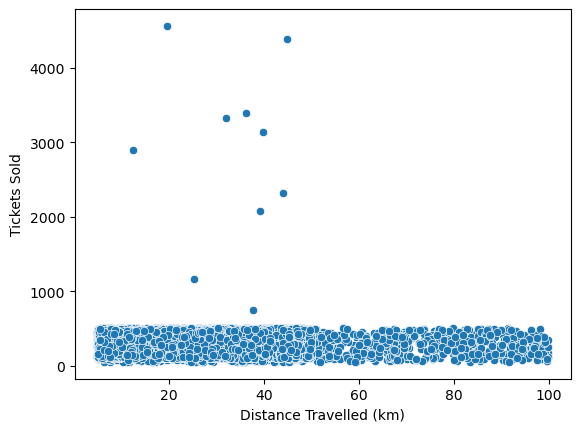

In [45]:
sns.scatterplot(data['Distance Travelled (km)'],data['Tickets Sold'])

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Trips per Day', ylabel='Distance Travelled (km)'>

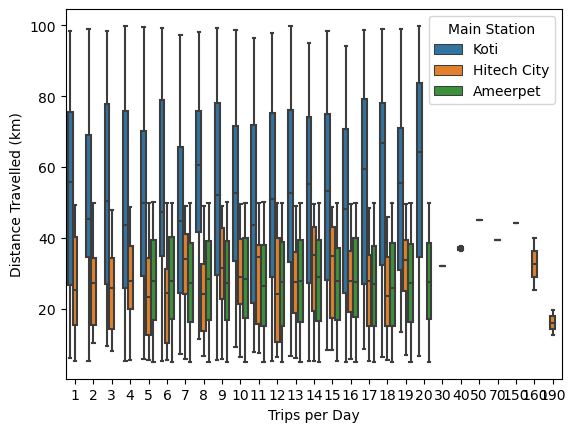

In [57]:
sns.boxplot(data['Trips per Day'],data['Distance Travelled (km)'], hue=data['Main Station'])


#### Multi-variate

In [68]:
data.columns

Index(['Date', 'Bus Route No.', 'From', 'To', 'Trips per Day', 'Way',
       'Bus Stops Covered', 'Frequency (mins)', 'Distance Travelled (km)',
       'Time (mins)', 'Main Station', 'Tickets Sold',
       'Revenue Generated (INR)'],
      dtype='object')

In [70]:
correlation_data=data.corr()
correlation_data

Trips per Day  Bus Stops Covered  Frequency (mins)  \
Trips per Day                 1.000000          -0.013235         -0.051791   
Bus Stops Covered            -0.013235           1.000000          0.079404   
Frequency (mins)             -0.051791           0.079404          1.000000   
Distance Travelled (km)      -0.029371           0.130012          0.172871   
Time (mins)                   0.007453          -0.001729         -0.011348   
Tickets Sold                  0.221572          -0.009848         -0.003102   
Revenue Generated (INR)       0.017488          -0.036992         -0.101087   

                         Distance Travelled (km)  Time (mins)  Tickets Sold  \
Trips per Day                          -0.029371     0.007453      0.221572   
Bus Stops Covered                       0.130012    -0.001729     -0.009848   
Frequency (mins)                        0.172871    -0.011348     -0.003102   
Distance Travelled (km)                 1.000000    -0.013222     -0.022210   
Time (mins)                            -0.013222     1.000000     -0.007552   
Tickets Sold                           -0.022210    -0.007552      1.000000   
Revenue Generated (INR)                -0.065495     0.007578     -0.006339   

                         Revenue Generated (INR)  
Trips per Day                           0.017488  
Bus Stops Covered                      -0.036992  
Frequency (mins)                       -0.101087  
Distance Travelled (km)                -0.065495  
Time (mins)                             0.007578  
Tickets Sold                           -0.006339  
Revenue Generated (INR)                 1.000000

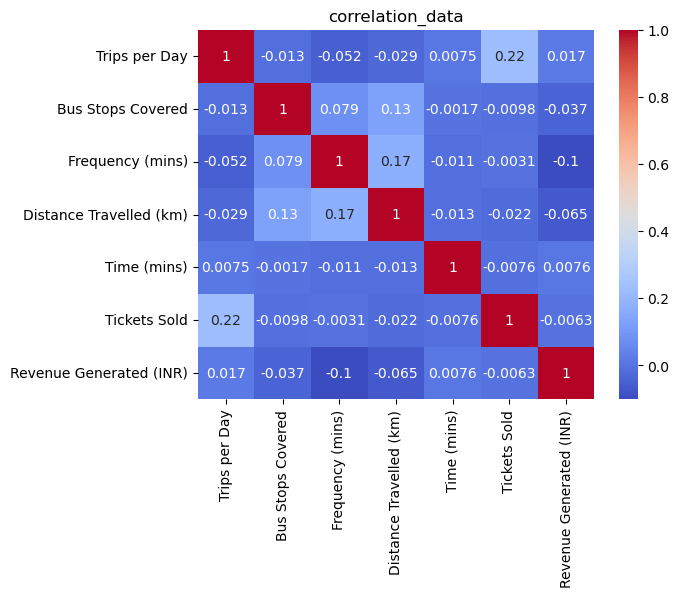

In [75]:
sns.heatmap(correlation_data, annot=True, cmap='coolwarm')
plt.title('correlation_data')
plt.show()

### 6.Typecasting:--

In [95]:
Data2=data.copy()
Data2

Date Bus Route No.                         From  \
0      01-01-2022          156S             Nagole Ring Road   
1      01-01-2022          45HK                HCU Bus Depot   
2      02-01-2022          201M  High Court Colony Deer Park   
3      02-01-2022         127VB        Rythu Bazar Erragadda   
4      03-01-2022          201M  High Court Colony Deer Park   
...           ...           ...                          ...   
14273  13-01-2025          225S                 Chengicherla   
14274  14-01-2025       9K/283K          Central Bus Station   
14275  14-01-2025      10H/250C      Chandrayan Gutta X Road   
14276  14-01-2025          230X                    Charminar   
14277  14-01-2025          223R                         KPHB   

                      To  Trips per Day         Way  Bus Stops Covered  \
0                Anajpur              8  Round Trip                 34   
1      Bachupally X Road              8     One-way                 11   
2           Kavadi Pally             10     One Way                  7   
3                   koti              2     One-way                  7   
4              Majeedpur             10  Round Trip                 34   
...                  ...            ...         ...                ...   
14273        Lingampally             19     One Way                 22   
14274     Gajula Ramaram             19  Round Trip                 23   
14275           Ameerpet             14  Round Trip                 22   
14276         Bachupally             13  Round Trip                  5   
14277           Ameerpet             12  Round Trip                 16   

       Frequency (mins)  Distance Travelled (km)  Time (mins) Main Station  \
0                  60.0                    59.68         47.0         Koti   
1                  27.0                    28.72         61.0  Hitech City   
2                  10.0                    20.12         58.0         Koti   
3                  46.0                    27.37         64.0  Hitech City   
4                  48.0                    85.46         28.0         Koti   
...                 ...                      ...          ...          ...   
14273               5.0                    11.62         61.0     Ameerpet   
14274               5.0                    45.00         21.0     Ameerpet   
14275               5.0                    34.52        102.0     Ameerpet   
14276               5.0                    43.74         99.0     Ameerpet   
14277              20.0                    45.63         66.0     Ameerpet   

       Tickets Sold  Revenue Generated (INR)  
0               369              1475.350000  
1               359              4144.820000  
2               261              2785.520000  
3               196              3355.805813  
4               428              2216.250000  
...             ...                      ...  
14273           386              8863.360000  
14274           269              9115.820000  
14275           205              6165.130000  
14276           218             14895.010000  
14277           214              6364.710000  

[14278 rows x 13 columns]

In [96]:
Data2=Data2.dropna()

In [97]:
Data2.isnull().sum()

Date                       0
Bus Route No.              0
From                       0
To                         0
Trips per Day              0
Way                        0
Bus Stops Covered          0
Frequency (mins)           0
Distance Travelled (km)    0
Time (mins)                0
Main Station               0
Tickets Sold               0
Revenue Generated (INR)    0
dtype: int64

In [99]:
Data2['Date']= Data2['Date'].astype('str')

C:\Users\mbrbh\AppData\Local\Temp\ipykernel_7252\703916827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data2['Date']= Data2['Date'].astype('str')


In [100]:
print(Data2['Date'].dtypes)

object


In [101]:
Data2['Trips per Day']=Data2['Trips per Day'].astype('float')
print(Data2['Trips per Day'].dtypes)

float64


C:\Users\mbrbh\AppData\Local\Temp\ipykernel_7252\4190624394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data2['Trips per Day']=Data2['Trips per Day'].astype('float')


In [102]:
data.columns

Index(['Date', 'Bus Route No.', 'From', 'To', 'Trips per Day', 'Way',
       'Bus Stops Covered', 'Frequency (mins)', 'Distance Travelled (km)',
       'Time (mins)', 'Main Station', 'Tickets Sold',
       'Revenue Generated (INR)'],
      dtype='object')

### 7.Handling Duplicates:-

In [103]:
duplicate_values = data[['Trips per Day', 'Bus Stops Covered', 'Frequency (mins)', 'Distance Travelled (km)', 
                   'Time (mins)', 'Tickets Sold', 'Revenue Generated (INR)']].duplicated().sum()
print(duplicate_values)

0


In [104]:
data.drop_duplicates(inplace = True)
print(data)

             Date Bus Route No.                         From  \
0      01-01-2022          156S             Nagole Ring Road   
1      01-01-2022          45HK                HCU Bus Depot   
2      02-01-2022          201M  High Court Colony Deer Park   
3      02-01-2022         127VB        Rythu Bazar Erragadda   
4      03-01-2022          201M  High Court Colony Deer Park   
...           ...           ...                          ...   
14273  13-01-2025          225S                 Chengicherla   
14274  14-01-2025       9K/283K          Central Bus Station   
14275  14-01-2025      10H/250C      Chandrayan Gutta X Road   
14276  14-01-2025          230X                    Charminar   
14277  14-01-2025          223R                         KPHB   

                      To  Trips per Day         Way  Bus Stops Covered  \
0                Anajpur              8  Round Trip                 34   
1      Bachupally X Road              8     One-way                 11   
2        

### 8. Outlier Treatment:-

In [ ]:
# Min= 1
# Lower_fence = Q1-1.5(IQR) = -4.0
# Mean = 12.344
# Median(Q2)= 12
# Higher_fence = Q3+1.5(IQR) = 28.0
# IQR=Q3-Q1
# Max= 190

#NOte: "Trips per Day" column is used:-  The range of outliers is anything below -4.0 and greaterthan +28.0 are outliers. 
#and between -4 to 28 is the accurate data.

In [105]:
data1=data['Trips per Day']
data1

0         8
1         8
2        10
3         2
4        10
         ..
14273    19
14274    19
14275    14
14276    13
14277    12
Name: Trips per Day, Length: 14278, dtype: int64

<AxesSubplot:xlabel='Trips per Day', ylabel='Count'>

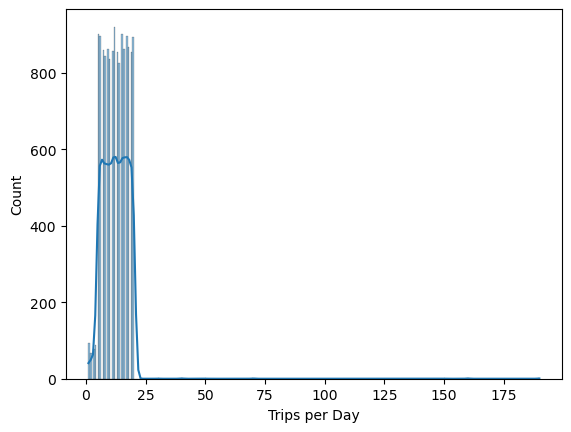

In [106]:
sns.histplot(data['Trips per Day'], kde=True)  # Checked the distribution of the data

{'whiskers': [<matplotlib.lines.Line2D at 0x28d4b4ff0a0>,
 'caps': [<matplotlib.lines.Line2D at 0x28d4b4ff640>,
 'boxes': [<matplotlib.lines.Line2D at 0x28d4b4efdf0>],
 'medians': [<matplotlib.lines.Line2D at 0x28d4b4ffbe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28d4b4ffee0>],
 'means': []}

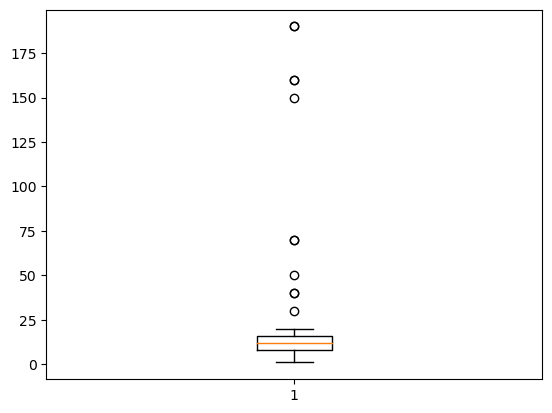

In [107]:
plt.boxplot(data['Trips per Day'])  # graphically identified the outliers

In [108]:
# finding the outliers values:

outlier=[]
def det_outlier(data1):
    threshold=3
    mean=np.mean(data1)
    std=np.std(data1)
    for i in data1:
        Zscore=(i-mean)/std
        if np.abs(Zscore)>threshold:
            outlier.append(i)
    return outlier
det_outlier(data1)

[40, 50, 190, 160, 160, 70, 40, 190, 30, 70, 150]

In [109]:
Q1 = Data2['Trips per Day'].quantile(0.25)
Q1

8.0

In [110]:
Q3 = Data2['Trips per Day'].quantile(0.75)
Q3

16.0

In [111]:
Q2=Data2['Trips per Day'].median()
Q2

12.0

In [112]:
IQR = Q3 - Q1
IQR

8.0

In [113]:
Lower_fence = Q1-1.5*IQR
Lower_fence

-4.0

In [114]:
Higher_fence=Q3+1.5*IQR
Higher_fence

28.0

{'whiskers': [<matplotlib.lines.Line2D at 0x28d4b55bbe0>,
 'caps': [<matplotlib.lines.Line2D at 0x28d4b3aa1c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x28d4b55b910>],
 'medians': [<matplotlib.lines.Line2D at 0x28d4b3aa760>],
 'fliers': [],
 'means': []}

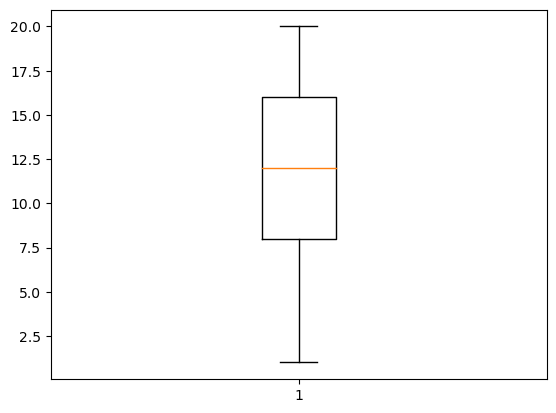

In [115]:
# Removing the outlies
plt.boxplot(data['Trips per Day'], showfliers=False)

### 9. Zero & near Zero Variance features:-

In [1]:
performance_Variance=data[['Trips per Day','Bus Stops Covered','Frequency (mins)','Distance Travelled (km)',
            'Time (mins)','Tickets Sold','Revenue Generated (INR)']].var()
near_zero_var_features = performance_Variance[performance_Variance < 0.01]
print(near_zero_var_features)

NameError: name 'data' is not defined

In [186]:
from sklearn.feature_selection import VarianceThreshold
def near_zero_variance(df, threshold=0.95):
    near_zero_features = []
    for column in df.columns:
        freq = df['Revenue Generated (INR)'].value_counts(normalize=True).iloc[0]
        if freq >= threshold:  # If the most frequent value appears more than 'threshold' proportion of the time
            near_zero_features.append('Revenue Generated (INR)')
    return near_zero_features

# Get near-zero variance features
near_zero_features = near_zero_variance(data)

print("Near-zero variance features:", near_zero_features)

Near-zero variance features: []


### 10.Missing Values:--

In [119]:
data.isnull().sum()

Date                        0
Bus Route No.              17
From                        0
To                          0
Trips per Day               0
Way                         0
Bus Stops Covered           0
Frequency (mins)           16
Distance Travelled (km)    19
Time (mins)                30
Main Station                0
Tickets Sold                0
Revenue Generated (INR)     0
dtype: int64

In [ ]:
# when there is no outliers in the data use mean
# when there is a outliers in the data use median

In [ ]:
#Note: The "Bus Route No."" column removing the nulls as it's string data type.

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Time (mins)'>

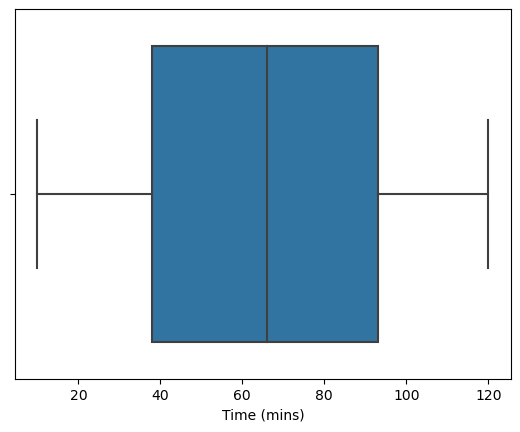

In [105]:
sns.boxplot(data['Time (mins)']) # There is no outliers so filling with mean value (65.5)

<AxesSubplot:xlabel='Frequency (mins)'>

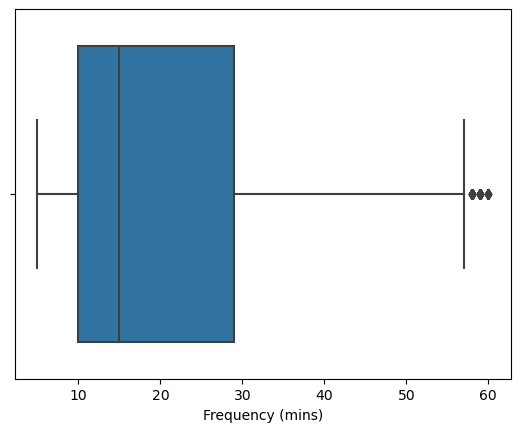

In [107]:
sns.boxplot(data['Frequency (mins)'])  # we have outliers so filling with median values (15.0)

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Distance Travelled (km)'>

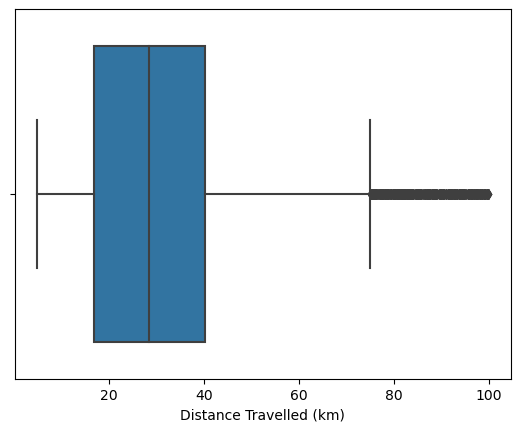

In [108]:
sns.boxplot(data['Distance Travelled (km)'])   #we have outliers so filling with median values (28.4)

In [130]:
data['Distance Travelled (km)']= data['Distance Travelled (km)'].fillna(data['Distance Travelled (km)'].median())

In [131]:
data['Frequency (mins)']= data['Frequency (mins)'].fillna(data['Frequency (mins)'].median())

In [132]:
data['Time (mins)']= data['Time (mins)'].fillna(data['Time (mins)'].mean())

In [133]:
data=data['Bus Route No.'].dropna()

0            156S
1            45HK
2            201M
3           127VB
4            201M
           ...   
14273        225S
14274     9K/283K
14275    10H/250C
14276        230X
14277        223R
Name: Bus Route No., Length: 14261, dtype: object

In [134]:
data.isnull().sum()

Date                        0
Bus Route No.              17
From                        0
To                          0
Trips per Day               0
Way                         0
Bus Stops Covered           0
Frequency (mins)            0
Distance Travelled (km)     0
Time (mins)                 0
Main Station                0
Tickets Sold                0
Revenue Generated (INR)     0
dtype: int64

In [143]:
data.describe()

Trips per Day  Bus Stops Covered  Frequency (mins)  \
count   14278.000000       14278.000000      14278.000000   
mean       12.343676          17.966732         18.144138   
std         5.718016           8.409151         11.201659   
min         1.000000           3.000000          5.000000   
25%         8.000000          11.000000         10.000000   
50%        12.000000          18.000000         15.000000   
75%        16.000000          24.000000         29.000000   
max       190.000000          50.000000         60.000000   

       Distance Travelled (km)   Time (mins)  Tickets Sold  \
count             14278.000000  14278.000000  14278.000000   
mean                 29.275180     65.549832      5.598301   
std                  15.710653     31.999191      0.463713   
min                   5.000000     10.000000      3.912023   
25%                  16.860000     38.000000      5.273000   
50%                  28.400000     66.000000      5.693732   
75%                  40.130000     93.000000      5.986452   
max                  99.820000    120.000000      8.425078   

       Revenue Generated (INR)      Ameerpet   Hitech City          Koti  
count             14278.000000  14278.000000  14278.000000  14278.000000  
mean               9125.130470      0.891161      0.039711      0.069127  
std               11586.443384      0.311448      0.195287      0.253679  
min                 503.040000      0.000000      0.000000      0.000000  
25%                4326.942500      1.000000      0.000000      0.000000  
50%                7710.900916      1.000000      0.000000      0.000000  
75%               11428.755000      1.000000      0.000000      0.000000  
max              149746.400000      1.000000      1.000000      1.000000

### 11. Normalization & Standardization:--

In [ ]:
#### Transformations Scaling and Normalization
#### Normalization:-

In [136]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit_transform(data[['Frequency (mins)','Distance Travelled (km)']])

array([[1.        , 0.57667159],
       [0.4       , 0.25015819],
       [0.09090909, 0.15946003],
       ...,
       [0.        , 0.31132672],
       [0.        , 0.40856359],
       [0.27272727, 0.4284961 ]])

In [ ]:
#### Standardization :-

In [137]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
scaling.fit_transform(data[['Frequency (mins)','Distance Travelled (km)']])

array([[ 3.73670804,  1.93536736],
       [ 0.79061259, -0.03533904],
       [-0.72707295, -0.58275749],
       ...,
       [-1.17345105,  0.33385014],
       [-1.17345105,  0.92073364],
       [ 0.16568325,  1.04103839]])

### 12. Discretization/Binning/Grouping:-

In [181]:
encoding= pd.cut(data['Tickets Sold'], bins=3, labels=['Low', 'Medium', 'High'])
data=pd.concat([data,encoding], axis=1)


ValueError: Input array must be 1 dimensional

In [182]:
data

Date Bus Route No.                         From  \
0      01-01-2022          156S             Nagole Ring Road   
1      01-01-2022          45HK                HCU Bus Depot   
2      02-01-2022          201M  High Court Colony Deer Park   
3      02-01-2022         127VB        Rythu Bazar Erragadda   
4      03-01-2022          201M  High Court Colony Deer Park   
...           ...           ...                          ...   
14273  13-01-2025          225S                 Chengicherla   
14274  14-01-2025       9K/283K          Central Bus Station   
14275  14-01-2025      10H/250C      Chandrayan Gutta X Road   
14276  14-01-2025          230X                    Charminar   
14277  14-01-2025          223R                         KPHB   

                      To  Trips per Day         Way  Bus Stops Covered  \
0                Anajpur              8  Round Trip                 34   
1      Bachupally X Road              8     One-way                 11   
2           Kavadi Pally             10     One Way                  7   
3                   koti              2     One-way                  7   
4              Majeedpur             10  Round Trip                 34   
...                  ...            ...         ...                ...   
14273        Lingampally             19     One Way                 22   
14274     Gajula Ramaram             19  Round Trip                 23   
14275           Ameerpet             14  Round Trip                 22   
14276         Bachupally             13  Round Trip                  5   
14277           Ameerpet             12  Round Trip                 16   

       Frequency (mins)  Distance Travelled (km)  Time (mins) Main Station  \
0                  60.0                    59.68         47.0         Koti   
1                  27.0                    28.72         61.0  Hitech City   
2                  10.0                    20.12         58.0         Koti   
3                  46.0                    27.37         64.0  Hitech City   
4                  48.0                    85.46         28.0         Koti   
...                 ...                      ...          ...          ...   
14273               5.0                    11.62         61.0     Ameerpet   
14274               5.0                    45.00         21.0     Ameerpet   
14275               5.0                    34.52        102.0     Ameerpet   
14276               5.0                    43.74         99.0     Ameerpet   
14277              20.0                    45.63         66.0     Ameerpet   

      Tickets Sold  Revenue Generated (INR)  Ameerpet  Hitech City  Koti  \
0         5.910797              1475.350000         0            0     1   
1         5.883322              4144.820000         0            1     0   
2         5.564520              2785.520000         0            0     1   
3         5.278115              3355.805813         0            1     0   
4         6.059123              2216.250000         0            0     1   
...            ...                      ...       ...          ...   ...   
14273     5.955837              8863.360000         1            0     0   
14274     5.594711              9115.820000         1            0     0   
14275     5.323010              6165.130000         1            0     0   
14276     5.384495             14895.010000         1            0     0   
14277     5.365976              6364.710000         1            0     0   

      Tickets Sold  
0           Medium  
1           Medium  
2           Medium  
3              Low  
4           Medium  
...            ...  
14273       Medium  
14274       Medium  
14275          Low  
14276          Low  
14277          Low  

[14278 rows x 17 columns]

In [180]:
dummy=pd.get_dummies(data['Tickets Sold'])
dummy

Tickets Sold  Tickets Sold_Low  Tickets Sold_Medium  Tickets Sold_High
0          5.910797                 0                    1                  0
1          5.883322                 0                    1                  0
2          5.564520                 0                    1                  0
3          5.278115                 1                    0                  0
4          6.059123                 0                    1                  0
...             ...               ...                  ...                ...
14273      5.955837                 0                    1                  0
14274      5.594711                 0                    1                  0
14275      5.323010                 1                    0                  0
14276      5.384495                 1                    0                  0
14277      5.365976                 1                    0                  0

[14278 rows x 4 columns]

### 13.Dummy Variable Creation (One-Hot Encoding_data):-

In [138]:
Dummy_vars= pd.get_dummies(data['Main Station'])
Dummy_vars
data= pd.concat([data, Dummy_vars], axis=1)
data
Final_data=data.drop(['Date','Bus Route No.','From','To','Way','Main Station'],axis=1)
Final_data

Trips per Day  Bus Stops Covered  Frequency (mins)  \
0                  8                 34              60.0   
1                  8                 11              27.0   
2                 10                  7              10.0   
3                  2                  7              46.0   
4                 10                 34              48.0   
...              ...                ...               ...   
14273             19                 22               5.0   
14274             19                 23               5.0   
14275             14                 22               5.0   
14276             13                  5               5.0   
14277             12                 16              20.0   

       Distance Travelled (km)  Time (mins)  Tickets Sold  \
0                        59.68         47.0           369   
1                        28.72         61.0           359   
2                        20.12         58.0           261   
3                        27.37         64.0           196   
4                        85.46         28.0           428   
...                        ...          ...           ...   
14273                    11.62         61.0           386   
14274                    45.00         21.0           269   
14275                    34.52        102.0           205   
14276                    43.74         99.0           218   
14277                    45.63         66.0           214   

       Revenue Generated (INR)  Ameerpet  Hitech City  Koti  
0                  1475.350000         0            0     1  
1                  4144.820000         0            1     0  
2                  2785.520000         0            0     1  
3                  3355.805813         0            1     0  
4                  2216.250000         0            0     1  
...                        ...       ...          ...   ...  
14273              8863.360000         1            0     0  
14274              9115.820000         1            0     0  
14275              6165.130000         1            0     0  
14276             14895.010000         1            0     0  
14277              6364.710000         1            0     0  

[14278 rows x 10 columns]

### 14.Transformations :-

In [ ]:
'Frequency (mins)', '', 
                   'Time (mins)', 'Tickets Sold', 'Revenue Generated (INR)'

In [161]:
#### 1. Mathematical Transformations:-
#### (i) Logarithmic Transformation:

log_data=np.log(data[['Trips per Day', 'Bus Stops Covered','Frequency (mins)',
                      'Distance Travelled (km)','Time (mins)','Revenue Generated (INR)']])
print(log_data)

       Trips per Day  Bus Stops Covered  Frequency (mins)  \
0           2.079442           3.526361          4.094345   
1           2.079442           2.397895          3.295837   
2           2.302585           1.945910          2.302585   
3           0.693147           1.945910          3.828641   
4           2.302585           3.526361          3.871201   
...              ...                ...               ...   
14273       2.944439           3.091042          1.609438   
14274       2.944439           3.135494          1.609438   
14275       2.639057           3.091042          1.609438   
14276       2.564949           1.609438          1.609438   
14277       2.484907           2.772589          2.995732   

       Distance Travelled (km)  Time (mins)  Revenue Generated (INR)  
0                     4.088997     3.850148                 7.296651  
1                     3.357594     4.110874                 8.329615  
2                     3.001714     4.060443           

In [9]:
#### (ii) Square Root Transformation:
sqrt_data=np.sqrt(data[['Trips per Day', 'Bus Stops Covered','Frequency (mins)',
                      'Distance Travelled (km)','Time (mins)','Revenue Generated (INR)']])
print(sqrt_data)

In [165]:
data.columns

Index(['Date', 'Bus Route No.', 'From', 'To', 'Trips per Day', 'Way',
       'Bus Stops Covered', 'Frequency (mins)', 'Distance Travelled (km)',
       'Time (mins)', 'Main Station', 'Tickets Sold',
       'Revenue Generated (INR)', 'Ameerpet', 'Hitech City', 'Koti',
       'Tickets Sold'],
      dtype='object')

In [168]:
#### 2. label encoding transformations:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit_transform(data['Main Station'])

array([2, 1, 2, ..., 0, 0, 0])

In [172]:
#### 3. Polynomial Transformations:-

from sklearn.preprocessing import PolynomialFeatures
PLF=PolynomialFeatures(degree=2)
poly=PLF.fit_transform(data)
print(poly)



C:\Anaconda\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


ValueError: Unable to convert array of bytes/strings into decimal numbers with dtype='numeric'

Date Bus Route No.                         From                 To  \
0  01-01-2022          156S             Nagole Ring Road            Anajpur   
1  01-01-2022          45HK                HCU Bus Depot  Bachupally X Road   
2  02-01-2022          201M  High Court Colony Deer Park       Kavadi Pally   
3  02-01-2022         127VB        Rythu Bazar Erragadda               koti   
4  03-01-2022          201M  High Court Colony Deer Park          Majeedpur   

   Trips per Day         Way  Bus Stops Covered Frequency (mins)  \
0              8  Round Trip                 34             High   
1              8     One-way                 11           Medium   
2             10     One Way                  7              Low   
3              2     One-way                  7             High   
4             10  Round Trip                 34             High   

   Distance Travelled (km)  Time (mins) Main Station  Tickets Sold  \
0                    59.68         47.0         Koti           369   
1                    28.72         61.0  Hitech City           359   
2                    20.12         58.0         Koti           261   
3                    27.37         64.0  Hitech City           196   
4                    85.46         28.0         Koti           428   

   Revenue Generated (INR)  
0              1475.350000  
1              4144.820000  
2              2785.520000  
3              3355.805813  
4              2216.250000

Date Bus Route No.                         From  \
0      01-01-2022          156S             Nagole Ring Road   
1      01-01-2022          45HK                HCU Bus Depot   
2      02-01-2022          201M  High Court Colony Deer Park   
3      02-01-2022         127VB        Rythu Bazar Erragadda   
4      03-01-2022          201M  High Court Colony Deer Park   
...           ...           ...                          ...   
14273  13-01-2025          225S                 Chengicherla   
14274  14-01-2025       9K/283K          Central Bus Station   
14275  14-01-2025      10H/250C      Chandrayan Gutta X Road   
14276  14-01-2025          230X                    Charminar   
14277  14-01-2025          223R                         KPHB   

                      To  Trips per Day         Way  Bus Stops Covered  \
0                Anajpur              8  Round Trip                 34   
1      Bachupally X Road              8     One-way                 11   
2           Kavadi Pally             10     One Way                  7   
3                   koti              2     One-way                  7   
4              Majeedpur             10  Round Trip                 34   
...                  ...            ...         ...                ...   
14273        Lingampally             19     One Way                 22   
14274     Gajula Ramaram             19  Round Trip                 23   
14275           Ameerpet             14  Round Trip                 22   
14276         Bachupally             13  Round Trip                  5   
14277           Ameerpet             12  Round Trip                 16   

      Frequency (mins)  Distance Travelled (km)  Time (mins) Main Station  \
0                 High                    59.68         47.0         Koti   
1               Medium                    28.72         61.0  Hitech City   
2                  Low                    20.12         58.0         Koti   
3                 High                    27.37         64.0  Hitech City   
4                 High                    85.46         28.0         Koti   
...                ...                      ...          ...          ...   
14273              Low                    11.62         61.0     Ameerpet   
14274              Low                    45.00         21.0     Ameerpet   
14275              Low                    34.52        102.0     Ameerpet   
14276              Low                    43.74         99.0     Ameerpet   
14277              Low                    45.63         66.0     Ameerpet   

       Tickets Sold  Revenue Generated (INR)  
0               369              1475.350000  
1               359              4144.820000  
2               261              2785.520000  
3               196              3355.805813  
4               428              2216.250000  
...             ...                      ...  
14273           386              8863.360000  
14274           269              9115.820000  
14275           205              6165.130000  
14276           218             14895.010000  
14277           214              6364.710000  

[14278 rows x 13 columns]

TypeError: '<=' not supported between instances of 'str' and 'float'

             Date Bus Route No.                         From  \
0      01-01-2022          156S             Nagole Ring Road   
1      01-01-2022          45HK                HCU Bus Depot   
2      02-01-2022          201M  High Court Colony Deer Park   
3      02-01-2022         127VB        Rythu Bazar Erragadda   
4      03-01-2022          201M  High Court Colony Deer Park   
...           ...           ...                          ...   
14273  13-01-2025          225S                 Chengicherla   
14274  14-01-2025       9K/283K          Central Bus Station   
14275  14-01-2025      10H/250C      Chandrayan Gutta X Road   
14276  14-01-2025          230X                    Charminar   
14277  14-01-2025          223R                         KPHB   

                      To  Trips per Day         Way  Bus Stops Covered  \
0                Anajpur              8  Round Trip                 34   
1      Bachupally X Road              8     One-way                 11   
2        

TypeError: loop of ufunc does not support argument 0 of type str which has no callable log method

Date Bus Route No.                         From                 To  \
0  01-01-2022          156S             Nagole Ring Road            Anajpur   
1  01-01-2022          45HK                HCU Bus Depot  Bachupally X Road   
2  02-01-2022          201M  High Court Colony Deer Park       Kavadi Pally   
3  02-01-2022         127VB        Rythu Bazar Erragadda               koti   
4  03-01-2022          201M  High Court Colony Deer Park          Majeedpur   

   Trips per Day         Way  Bus Stops Covered  Frequency (mins)  \
0              8  Round Trip                 34              60.0   
1              8     One-way                 11              27.0   
2             10     One Way                  7              10.0   
3              2     One-way                  7              46.0   
4             10  Round Trip                 34              48.0   

   Distance Travelled (km)  Time (mins) Main Station  Tickets Sold  \
0                    59.68         47.0         Koti           369   
1                    28.72         61.0  Hitech City           359   
2                    20.12         58.0         Koti           261   
3                    27.37         64.0  Hitech City           196   
4                    85.46         28.0         Koti           428   

   Revenue Generated (INR)  
0              1475.350000  
1              4144.820000  
2              2785.520000  
3              3355.805813  
4              2216.250000